In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons

In [3]:
# create random datasets
x_rnd, y_rnd = make_moons(n_samples=200, noise=0.1, random_state=42)
print(x_rnd)
X = torch.tensor(x_rnd, dtype=torch.float32)
y = torch.tensor(y_rnd, dtype=torch.long)

[[-1.04942573e+00  8.44426315e-02]
 [ 9.22817545e-01  4.57488507e-01]
 [ 6.56786593e-01  6.99596694e-01]
 [ 1.18894020e+00 -3.86528073e-01]
 [ 2.89264549e-01 -1.37744892e-01]
 [ 2.51685082e-01  1.81006054e-01]
 [-6.68120991e-01  8.22265447e-01]
 [ 1.55626644e+00 -2.03445580e-01]
 [ 1.87213538e+00 -1.25335230e-01]
 [ 1.43229273e-01  9.53267512e-01]
 [-4.35091327e-01  7.43738050e-01]
 [ 1.91161702e+00 -1.05146485e-01]
 [ 1.53432590e+00 -3.97547101e-01]
 [-8.24879535e-01  5.29607749e-01]
 [ 1.88043395e+00  1.54681644e-01]
 [ 1.87043050e+00 -9.01427936e-02]
 [-6.84180156e-02  1.23271872e+00]
 [ 1.04680086e+00 -5.17441448e-01]
 [-1.00198756e+00  6.32750117e-01]
 [-4.23980382e-01  7.45855239e-01]
 [ 3.38030046e-01 -6.83719318e-02]
 [ 8.96478204e-01  5.70936879e-01]
 [ 9.69901385e-01 -6.20552828e-01]
 [-8.76993958e-01  3.21761811e-01]
 [-3.98820968e-01  7.86003637e-01]
 [-4.02185906e-01  8.31958013e-01]
 [-8.11837713e-01  5.85065474e-01]
 [-4.84776843e-01  9.43778988e-01]
 [ 2.11761003e-01 -1

In [4]:
# create nn class
class ffnn(nn.Module):
    def __init__(self, input_f, hidden_f, output_f):
        super(ffnn, self).__init__()
        self.fc1 = nn.Linear(input_f, hidden_f)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_f, output_f)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [5]:
# define nn and its hyperparameters
nn_model = ffnn(2, 8, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.01, weight_decay=1e-5)

50/1000, loss: 0.3345
100/1000, loss: 0.1915
150/1000, loss: 0.1275
200/1000, loss: 0.0781
250/1000, loss: 0.0497
300/1000, loss: 0.0344
350/1000, loss: 0.0255
400/1000, loss: 0.0199
450/1000, loss: 0.0160
500/1000, loss: 0.0132
550/1000, loss: 0.0110
600/1000, loss: 0.0092
650/1000, loss: 0.0079
700/1000, loss: 0.0069
750/1000, loss: 0.0060
800/1000, loss: 0.0053
850/1000, loss: 0.0047
900/1000, loss: 0.0042
950/1000, loss: 0.0038
1000/1000, loss: 0.0035


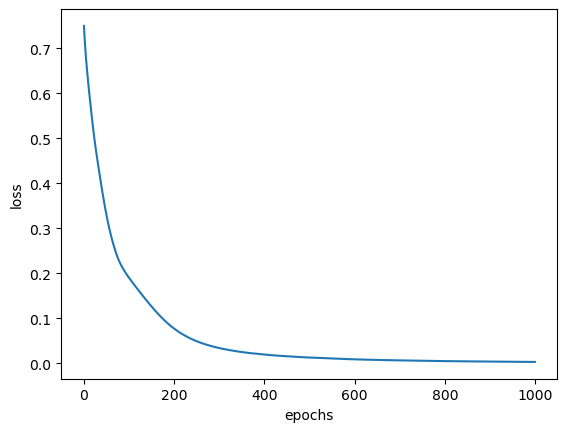

In [6]:
# training set
epochs = 1000
losses = []
for epoch in range(epochs):
    y_pred = nn_model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 50 == 0:
        print(f"{epoch+1}/{epochs}, loss: {loss.item():.4f}")
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

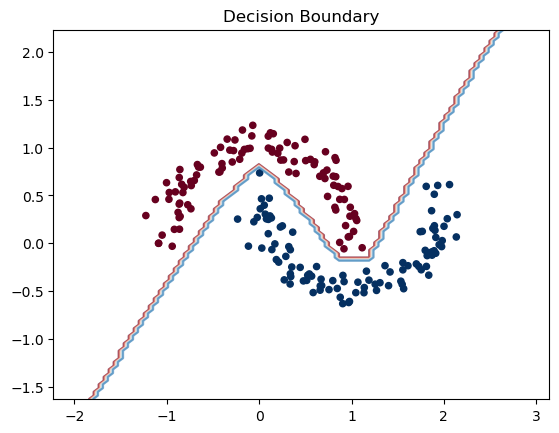

In [7]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100),
)
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
preds = nn_model(grid).detach().numpy()
preds = np.argmax(preds, axis=1)

plt.contour(xx, yy, preds.reshape(xx.shape), cmap="RdBu", alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", s=20)
plt.title("Decision Boundary")
plt.show()